In [2]:
import os
import subprocess
FNULL = open(os.devnull, 'w')

args_names = [
    'batch-size',
    'resnet-layers',
]

def run_script(args):

    main_command = [
        'python3',
        'get_memory_alloc.py',
    ]

    options = {}
    options.update(dict(zip(args_names, args)))
    

    whole_command = main_command
    for k, v in options.items():
        whole_command.append('--' + k)
        whole_command.append(v)

    print(whole_command)
    process = subprocess.Popen(args=whole_command, stdout=FNULL)
    return process

In [24]:
import numpy as np
# for nlayers in [18, 34, 50, 101, 152]:
for nlayers in [18]:
    # for bs in np.arange(1, 16)*16:
    for bs in np.arange(14,15)*16:
        process = run_script([str(bs), str(nlayers)])
        process.wait()

['python3', 'get_memory_alloc.py', '--batch-size', '224', '--resnet-layers', '34']


/usr0/home/kkuo2/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr0/home/kkuo2/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Traceback (most recent call last):
  File "/usr0/home/kkuo2/Documents/get_memory_alloc.py", line 93, in <module>
    mem = get_mem(model, args.batch_size, device, optimizer, criterion, logdir=f"resnet{args.resnet_layers}_batch{args.batch_size}")
  File "/usr0/home/kkuo2/Documents/get_memory_alloc.py", line 46, in get_mem
    loss = train(model, batch_da

In [18]:
import pickle as pkl
with open("mem_stats.pkl", "rb") as f:
    mem_stats = pkl.load(f)
print(mem_stats)

{18: {16: 526280704, 32: 886546944, 48: 1243798528, 64: 1606112768, 80: 2019987456, 96: 2382842368, 112: 2690222592, 128: 3051177472, 144: 3413869056, 160: 3772726272, 176: 4136744960, 192: 4492489216, 208: 4855345152, 224: 5212875264, 240: 5577054208}, 34: {16: 814080000, 32: 1335302656, 48: 1850184704, 64: 2369785344, 80: 2953840640, 96: 3471311360, 112: 3943858688, 128: 4464705024, 144: 4993251840, 160: 5504232448, 176: 6032188928, 192: 6545992192, 208: 7065692160, 224: 7572805120}, 50: {16: 1718650368, 32: 3110325760, 48: 4495230976, 64: 5879480832, 80: 7277264384}, 101: {16: 2606226432, 32: 4653065216, 48: 6689562112}, 152: {16: 3607187968, 32: 6473816576}}


Text(0, 0.5, 'Required Memory (GB)')

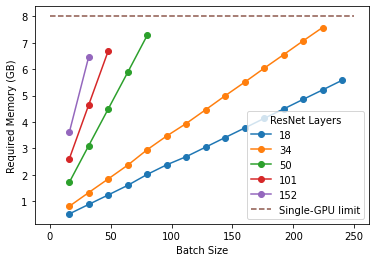

In [23]:
import matplotlib.pyplot as plt
for k, vs in mem_stats.items():
    plt.plot(vs.keys(), np.array(list(vs.values())) / 1e9, label=k, marker='o')
plt.plot([0,250], [8,8],linestyle='--', label='Single-GPU limit')
plt.legend(title="ResNet Layers")
plt.xlabel('Batch Size')
plt.ylabel('Required Memory (GB)')